# Problem Statement: 
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Information about the Dataset:

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.


The data set contains the following diseases:

    Actinic keratosis
    Basal cell carcinoma
    Dermatofibroma
    Melanoma
    Nevus
    Pigmented benign keratosis
    Seborrheic keratosis
    Squamous cell carcinoma
    Vascular lesion

#### Project Pipeline:

    1. Data Reading/Data Understanding → Defining the path for train and test images 
   
    2. Dataset Creation→ Create train & validation dataset from the train directory with a batch size of 32. Also, make sure you resize your images to 180*180.

    3. Dataset visualisation → Create a code to visualize one instance of all the nine classes present in the dataset 

    4. Model Building & training : 
        Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).

    5. Choosing an appropriate optimiser and loss function for model training

    6. Training the model for ~20 epochs

    7. Writing my findings after the model fit. You must check if there is any evidence of model overfit or underfit.

    8. Chosing an appropriate data augmentation strategy to resolve underfitting/overfitting 
    
    9. Model Building & training on the augmented data :

        Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model rescale images to normalize pixel values between (0,1).

    10. Choosing an appropriate optimiser and loss function for model training

    11. Training the model for ~20 epochs

    12. Writing my findings after the model fit, see if the earlier issue is resolved or not?
    
    13. Class distribution: Examine the current class distribution in the training dataset 
        - Which class has the least number of samples?
        - Which classes dominate the data in terms of the proportionate number of samples?

    14. Handling class imbalances: Rectify class imbalances present in the training dataset with Augmentor library.

    15. Model Building & training on the rectified class imbalance data :

    16. Creating a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).

    17. Choosing an appropriate optimiser and loss function for model training

    18. Training the model for ~30 epochs

    19. Writing my findings after the model fit, see if the issues are resolved or not?
 

#### Note: 
    Due to delay in colab environment, I have developed this project in my own Local machine. I have used "NVIDIA GeForce RTX 2070" GPU which has been integrated with Jupyter Notebook for local implementation. Tensorflow-gpu module has been installed to support NVIDIA GPU.

In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib

import warnings
warnings.filterwarnings("ignore")

In [2]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13757070882542039985
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6296698880
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4467476558717111448
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [3]:
!pip install matplotlib

In [4]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("C:/Users/SHAOWN/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('C:/Users/SHAOWN/Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [7]:
batch_size = 32
img_height = 180
img_width = 180

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation 
from tensorflow.keras.preprocessing import image 


In [9]:
# train_datagen = ImageDataGenerator(rescale = 1./255 , shear_range = 0.2, zoom_range = 0.2 , horizontal_flip = True   )
# test_datagen = ImageDataGenerator (rescale=1. /255)

# # train_generator = train_datagen.flow_from_directory(data_dir_train, target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary',classes=['actinic keratosis','basal cell carcinoma','dermatofibroma','melanoma','nevus','pigmented benign keratosis','seborrheic keratosis','squamous cell carcinoma','vascular lesion'] )

# test_generator = test_datagen.flow_from_directory(data_dir_test,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary')

In [10]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ='training', 
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [11]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [12]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [13]:
class_names= list(class_names)

In [14]:
class_names[0]

'actinic keratosis'

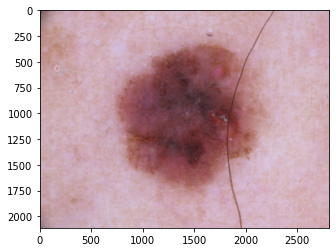

In [15]:
import matplotlib.image as mpimg
#img = mpimg.imread("Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\melanoma\\ISIC_0000139.jpg")
img = mpimg.imread(os.path.join(data_dir_train, "melanoma\\ISIC_0000139" + "." + "jpg"))
imgplot = plt.imshow(img)
plt.show()

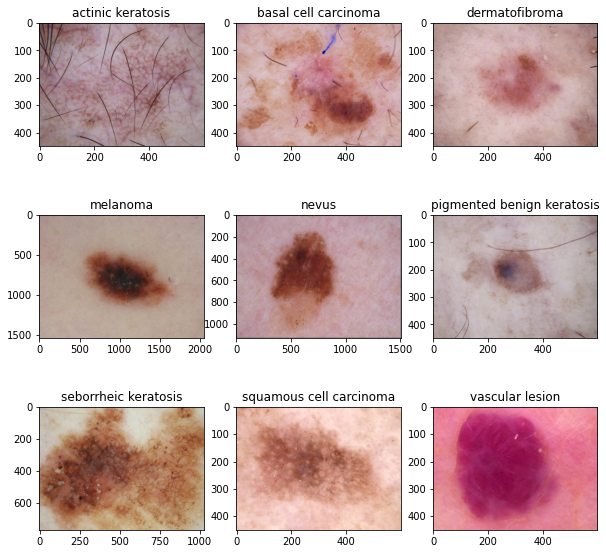

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  class_name=class_names[i]
  image = plt.imread(str(list(data_dir_train.glob(class_name+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [17]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [18]:
# import tensorflow.keras.backend as k

# if k.image_data_format() == 'channels_first':
#   input_shape = (3, img_width, img_height)
# else:
#   input_shape=(img_width,img_height,3)

In [19]:
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
num_classes = 9
model = Sequential([
                    Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (img_height, img_width, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

In [20]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

In [22]:
epochs=20

In [23]:
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds )

Epoch 1/20
56/56 [==============================] - 10s 69ms/step - loss: 2.0556 - accuracy: 0.1881 - val_loss: 2.0247 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 3s 48ms/step - loss: 2.0195 - accuracy: 0.2227 - val_loss: 1.9687 - val_accuracy: 0.2506
Epoch 3/20
56/56 [==============================] - 3s 48ms/step - loss: 1.9906 - accuracy: 0.2372 - val_loss: 1.9607 - val_accuracy: 0.2371
Epoch 4/20
56/56 [==============================] - 3s 48ms/step - loss: 1.9352 - accuracy: 0.2751 - val_loss: 1.8689 - val_accuracy: 0.2998
Epoch 5/20
56/56 [==============================] - 3s 48ms/step - loss: 1.9042 - accuracy: 0.2852 - val_loss: 1.8672 - val_accuracy: 0.3333
Epoch 6/20
56/56 [==============================] - 3s 48ms/step - loss: 1.9487 - accuracy: 0.2695 - val_loss: 1.8968 - val_accuracy: 0.2707
Epoch 7/20
56/56 [==============================] - 3s 48ms/step - loss: 1.8812 - accuracy: 0.2863 - val_loss: 1.8996 - val_accuracy: 0.2908
Epoch 8/20
5

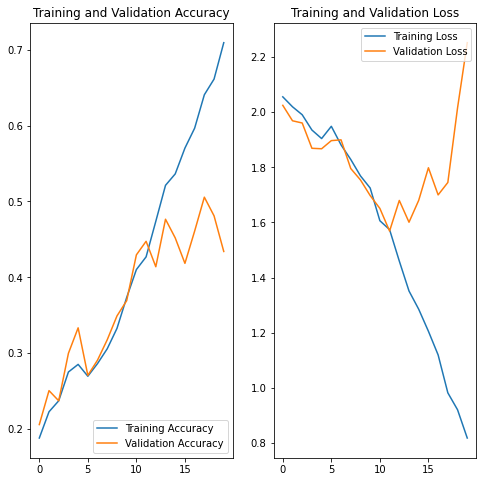

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Initial Findings on our first model(Basic):
         -  As per above Acuracy graph, it's clearly visible that there is overfitting issue in this model. After approx. 12 epochs , the gap has been increased drastically.
         
         - As per above loss graph, after 10 epochs loss gap has been drastically increased.
    

In [25]:
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom
augment_dt = keras.Sequential([RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),RandomRotation(0.2, fill_mode='reflect'),RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

#### Visualizing how  augmentation strategy works for one instance of training image. 

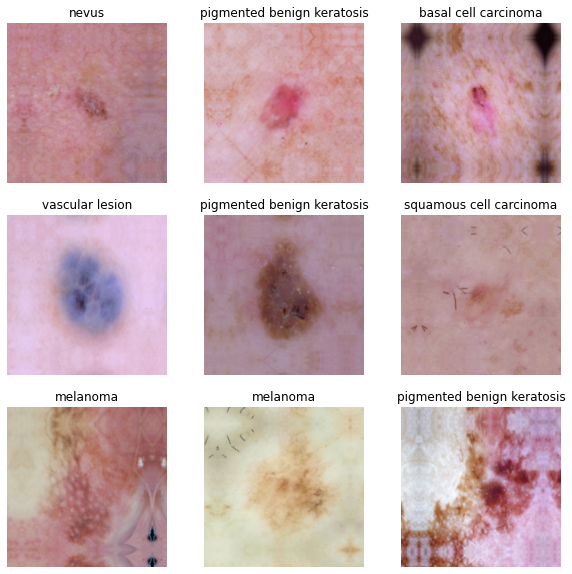

In [26]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augment_dt(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [27]:
num_classes = 9
model1 = Sequential([ augment_dt,Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model1.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (img_height, img_width, 32)))
model1.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))


model1.add(Flatten())
model1.add(Dense(num_classes, activation = "softmax"))

In [28]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model1.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [29]:
history = model1.fit(train_ds, epochs=epochs, validation_data=val_ds )

Epoch 1/20
56/56 [==============================] - 4s 52ms/step - loss: 2.0652 - accuracy: 0.1903 - val_loss: 2.0372 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 3s 51ms/step - loss: 2.0403 - accuracy: 0.2037 - val_loss: 2.0253 - val_accuracy: 0.2036
Epoch 3/20
56/56 [==============================] - 3s 51ms/step - loss: 2.0232 - accuracy: 0.2059 - val_loss: 2.0333 - val_accuracy: 0.1924
Epoch 4/20
56/56 [==============================] - 3s 51ms/step - loss: 2.0228 - accuracy: 0.2126 - val_loss: 2.0326 - val_accuracy: 0.2125
Epoch 5/20
56/56 [==============================] - 3s 51ms/step - loss: 2.0174 - accuracy: 0.2121 - val_loss: 2.0041 - val_accuracy: 0.1946
Epoch 6/20
56/56 [==============================] - 3s 51ms/step - loss: 1.9414 - accuracy: 0.2690 - val_loss: 1.8510 - val_accuracy: 0.3177
Epoch 7/20
56/56 [==============================] - 3s 51ms/step - loss: 1.8958 - accuracy: 0.2952 - val_loss: 1.8021 - val_accuracy: 0.2975
Epoch 8/20
56

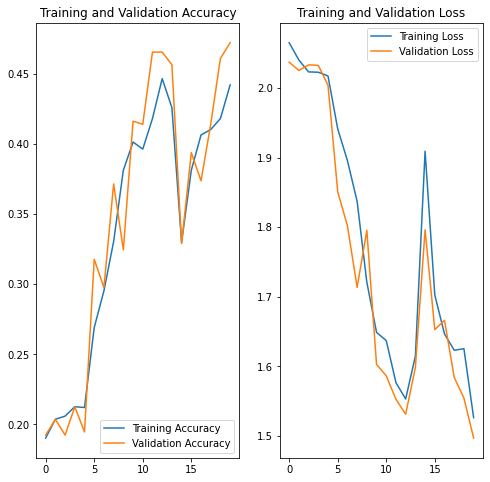

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings after adding dropout & data augumentation strategy:
    - It's clearly visible that overfitting issue has been resolved though accuracy is not still below approx. 45%.

In [31]:
dir_lst=[]
lesn_list=[]
for i in class_names:
      
    for a in data_dir_train.glob(i+'/*.jpg'):
        dir_lst.append(str(a))
        lesn_list.append(i)
dataframe_dict_original = dict(zip(dir_lst, lesn_list))
df_dt = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Directory','Labels'])
df_dt

,Directory,Labels
0,C:\Users\SHAOWN\Downloads\CNN_assignment\Skin ...,actinic keratosis
1,C:\Users\SHAOWN\Downloads\CNN_assignment\Skin ...,actinic keratosis
2,C:\Users\SHAOWN\Downloads\CNN_assignment\Skin ...,actinic keratosis
3,C:\Users\SHAOWN\Downloads\CNN_assignment\Skin ...,actinic keratosis
4,C:\Users\SHAOWN\Downloads\CNN_assignment\Skin ...,actinic keratosis
...,...,...
2234,C:\Users\SHAOWN\Downloads\CNN_assignment\Skin ...,vascular lesion
2235,C:\Users\SHAOWN\Downloads\CNN_assignment\Skin ...,vascular lesion
2236,C:\Users\SHAOWN\Downloads\CNN_assignment\Skin ...,vascular lesion
2237,C:\Users\SHAOWN\Downloads\CNN_assignment\Skin ...,vascular lesion


In [32]:
df_dt_main = dict(zip(dir_lst, lesn_list))
df_dt = pd.DataFrame(list(df_dt_main.items()),columns = ['Directory','Labels'])
df_dt

,Directory,Labels
0,C:\Users\SHAOWN\Downloads\CNN_assignment\Skin ...,actinic keratosis
1,C:\Users\SHAOWN\Downloads\CNN_assignment\Skin ...,actinic keratosis
2,C:\Users\SHAOWN\Downloads\CNN_assignment\Skin ...,actinic keratosis
3,C:\Users\SHAOWN\Downloads\CNN_assignment\Skin ...,actinic keratosis
4,C:\Users\SHAOWN\Downloads\CNN_assignment\Skin ...,actinic keratosis
...,...,...
2234,C:\Users\SHAOWN\Downloads\CNN_assignment\Skin ...,vascular lesion
2235,C:\Users\SHAOWN\Downloads\CNN_assignment\Skin ...,vascular lesion
2236,C:\Users\SHAOWN\Downloads\CNN_assignment\Skin ...,vascular lesion
2237,C:\Users\SHAOWN\Downloads\CNN_assignment\Skin ...,vascular lesion


<BarContainer object of 9 artists>

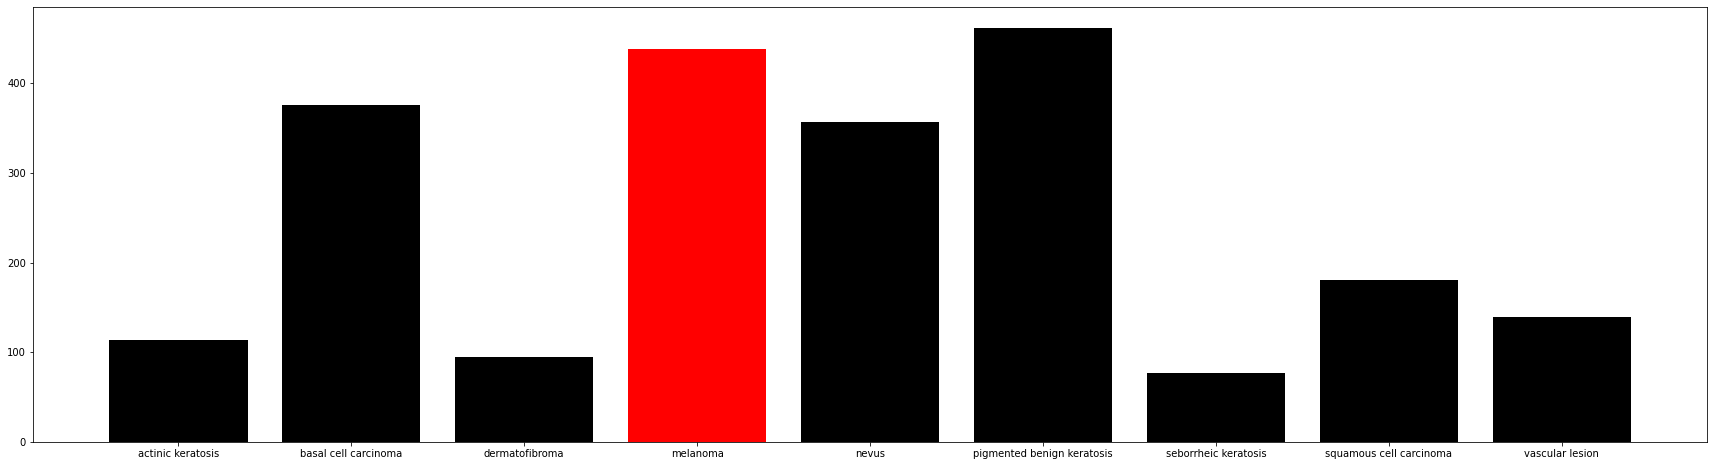

In [33]:
a=[]
for x in class_names:
    a.append(len(list(data_dir_train.glob(x+'/*.jpg'))))
plt.figure(figsize=(30,8))
plt.bar(class_names,a,color=['black', 'black', 'black', 'red', 'black','black','black','black','black'])

#### Observations:
        - As per graph, Seborrheic keratosis class has the lowest distribution. Comapring to 'melanoma'& 'pigmented benign keratosis' class , it's significantly low.
        - Pigmented benign keratosis class has the highesr distribution. 

In [34]:
#!pip install --upgrade Augmentor==0.2.7

In [35]:
import Augmentor

In [36]:
type(data_dir_train)
from pathlib import Path


In [37]:
for i in class_names:
    classpath = Path(i)
    p = Augmentor.Pipeline(data_dir_train/classpath)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:\Users\SHAOWN\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1DE4F9389D0>: 100%|█| 500/500 [00:01<00:00, 251.26 Samples


Initialised with 376 image(s) found.
Output directory set to C:\Users\SHAOWN\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1DE4F989670>: 100%|█| 500/500 [00:01<00:00, 256.54 Samples


Initialised with 95 image(s) found.
Output directory set to C:\Users\SHAOWN\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1DE4C086970>: 100%|█| 500/500 [00:01<00:00, 254.84 Samples


Initialised with 438 image(s) found.
Output directory set to C:\Users\SHAOWN\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x1DC73589280>: 100%|█| 500/500 [00:09<00:00, 52.71 Sample


Initialised with 357 image(s) found.
Output directory set to C:\Users\SHAOWN\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=919x802 at 0x1DE4F94F820>: 100%|█| 500/500 [00:09<00:


Initialised with 462 image(s) found.
Output directory set to C:\Users\SHAOWN\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1DE4F979640>: 100%|█| 500/500 [00:01<00:00, 296.03 Samples


Initialised with 77 image(s) found.
Output directory set to C:\Users\SHAOWN\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1DE4C021880>: 100%|█| 500/500 [00:03<00:00, 126.58 Sample


Initialised with 181 image(s) found.
Output directory set to C:\Users\SHAOWN\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1DE4F962340>: 100%|█| 500/500 [00:01<00:00, 285.06 Samples


Initialised with 139 image(s) found.
Output directory set to C:\Users\SHAOWN\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\vascular lesion\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1DC73589160>: 100%|█| 500/500 [00:01<00:


In [38]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [39]:
import glob
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['C:\\Users\\SHAOWN\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_b7c1e7fc-436e-46e2-b0f3-27b49224680b.jpg',
 'C:\\Users\\SHAOWN\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_c457e9e2-6710-40b5-bea5-7f260990c0f6.jpg',
 'C:\\Users\\SHAOWN\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_1d3fa06a-fac9-4746-bc93-b88ba5be235b.jpg',
 'C:\\Users\\SHAOWN\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_8e5386cd-a3b0-43d2-a047-3907b68a8d42.jpg',
 'C:\\Users\\SHAOWN\\Downloads\\CNN_assignment\\Skin cancer ISIC The Int

In [40]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [41]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [42]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df_dt.append(df2)

In [43]:
new_df['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

In [44]:
pd.options.display.max_colwidth = 250
df2['Path'].head(5)

0    C:\Users\SHAOWN\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output\actinic keratosis_original_ISIC_0025780.jpg_b7c1e7fc-436e-46e2-b0f3-27b49224680b.jpg
1    C:\Users\SHAOWN\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output\actinic keratosis_original_ISIC_0025780.jpg_c457e9e2-6710-40b5-bea5-7f260990c0f6.jpg
2    C:\Users\SHAOWN\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output\actinic keratosis_original_ISIC_0025803.jpg_1d3fa06a-fac9-4746-bc93-b88ba5be235b.jpg
3    C:\Users\SHAOWN\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output\actinic keratosis_original_ISIC_0025803.jpg_8e5386cd-a3b0-43d2-a047-3907b68a8d42.jpg
4    C:\Users\SHAOWN\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaborat

In [45]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

4500
118


In [46]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [47]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation', ## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [48]:
num_classes = 9
model2 = Sequential([ augment_dt,Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (img_height, img_width, 32)))
model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))


model2.add(Flatten())
model2.add(Dense(num_classes, activation = "softmax"))

In [49]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model2.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [50]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 32)      2432      
                                                                 
 conv2d_10 (Conv2D)          (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 90, 90, 32)        25632     
                                                      

In [51]:
epochs=30
history = model2.fit(train_ds, epochs=epochs, validation_data=val_ds )

Epoch 1/30
169/169 [==============================] - 13s 69ms/step - loss: 2.1086 - accuracy: 0.1790 - val_loss: 1.8002 - val_accuracy: 0.2984
Epoch 2/30
169/169 [==============================] - 11s 63ms/step - loss: 1.8036 - accuracy: 0.2867 - val_loss: 1.8699 - val_accuracy: 0.2895
Epoch 3/30
169/169 [==============================] - 11s 63ms/step - loss: 1.7383 - accuracy: 0.3201 - val_loss: 1.6928 - val_accuracy: 0.3452
Epoch 4/30
169/169 [==============================] - 11s 63ms/step - loss: 1.6671 - accuracy: 0.3565 - val_loss: 1.5710 - val_accuracy: 0.4031
Epoch 5/30
169/169 [==============================] - 11s 63ms/step - loss: 1.6279 - accuracy: 0.3809 - val_loss: 1.6736 - val_accuracy: 0.3608
Epoch 6/30
169/169 [==============================] - 11s 63ms/step - loss: 1.5653 - accuracy: 0.3852 - val_loss: 1.5635 - val_accuracy: 0.4187
Epoch 7/30
169/169 [==============================] - 11s 63ms/step - loss: 1.5462 - accuracy: 0.4000 - val_loss: 1.4854 - val_accuracy:

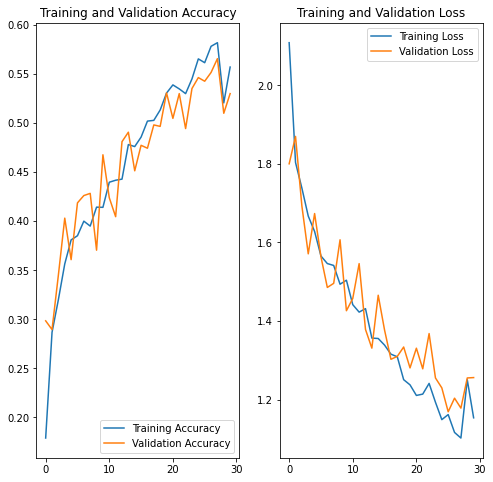

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Final Observations after resolving data imbalancing issue:
        - Accuracy has been increased gradually upto 58%.
        
        - Gap between Training & Validation accuracy is low which is good.